# Análisis de Correspondencias Múltiple:
#### Autor: 
        Fabian Ricardo Luengas Ruiz
## Encuesta social de estudiantes de secundaria
Se desarrolla un análisis de correspondencia múltiple para las observaciones obtenidas a través de una encuesta realizada en dos escuelas secundarias específicamente en las clases de matemáticas y portugues. Esta encuesta busca predecir la calificación final en la cual terminará el estudiante encuestado en la materia inscrita.

Así mismo, se busca establecer relación o dependencia entre el comportamiento del estudiante y los factores sociales que lo envuelven entre su familia y amigos, por tanto, en este estudio se encontrarán pruebas de independencia Chi-Cuadrado entre algunas variables que en primera instancia se presumen como dependientes entre sí.

Para mayor claridad a continuación se relaciona el glosario de las variables observadas en la encuesta. 

   - sex - Sexo del estudiante ('F' - female or 'M' - male)
   - age - Edad del estudiante from 15 to 22)
   - address- Dirección de hogar del estudiante type ('U' - Urbano or 'R' - Rural)
   - famsize - Tamaño de la familia ('LE3' - Menor ó igual a 3 or 'GT3' - Más de 3)
   - Pstatus - Estado de cohabitación de los padres ( 'T' - living together or 'A' - apart)
   - Medu - Educación de la madre (0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
   - Fedu - Educación del padre (0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
   - Mjob - Ocupación Madre ('teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
   - Fjob - Ocupación Padre ('teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
   - reason - Razón de escoger la escuela (close to 'home', school 'reputation', 'course' preference or 'other')
   - guardian - Encargado del estudiante ('mother', 'father' or 'other')
   - traveltime - Tiempo de la casa a la escuela (1 - 1 hour)
   - studytime - Tiempo semanal de estudio (1 - 10 hours)
   - failures - Número de fallas en clases pasadas (n if 1<=n<3, else 4)
   - schoolsup - Apoyo extra educativo (yes or no)
   - famsup - Apoyo educativo familiar (yes or no)
   - paid - Pago extra para las clases (Math or Portuguese) (yes or no)
   - activities - Actividades extracurriculares (yes or no)
   - nursery - Atendido en la enfermería del colegio (yes or no)
   - higher - Quiere tomar educación superior (yes or no)
   - internet - Acceso a internet (yes or no)
   - romantic - En una relación amorosa (yes or no)
   - famrel - Calidad de la relación familiar (from 1 - very bad to 5 - excellent)
   - freetime - Tiempo libre después de escuela (from 1 - very low to 5 - very high)
   - goout - Salidas con sus amigos (from 1 - very low to 5 - very high)
   - Dalc - Consumo de alcohol mientras trabaja (from 1 - very low to 5 - very high)
   - Walc - Consumo de alcohol fin de semana (from 1 - very low to 5 - very high)
   - health - Estado actual de salud (from 1 - very bad to 5 - very good)
   - absences - Cantidad de ausencias al colegio (from 0 to 93)

### Librerias

In [1]:
library(ggplot2)
library(FactoMineR)
library(factoextra)
library(dplyr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'FactoMineR' was built under R version 3.6.3"Warning message:
"package 'factoextra' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



### Carga y tratamiento de la base de datos.

La base de datos ha sido extraida del repositorio en linea de https://www.kaggle.com/uciml/student-alcohol-consumption, donde se encuentran dos datasets de dos clases diferentes, clase de portugues y clase de matematicas en dos diferentes escuelas secundarias, A continuación, se presentan variables potenciales para categorizar y su respectivo proceso de categorización. 

In [2]:
df <- read.csv("student-mat.csv")

In [5]:
df$famrel <- as.factor(df$famrel)
df$freetime <- as.factor(df$freetime)
df$goout <- as.factor(df$goout)
df$Dalc <- as.factor(df$Dalc)
df$Walc <- as.factor(df$Walc)
df$health <- as.factor(df$health)
df$failures <- as.factor(df$failures)
df$studytime  <- as.factor(df$studytime)
df$Medu <- as.factor(df$Medu)
df$Fedu <- as.factor(df$Fedu)

In [6]:
levels(df$famrel) <- c("Muy Malo","Malo","Regular","Bueno","Muy Bueno")
levels(df$freetime) <- c("Muy Bajo","Bajo","Medio","Alto","Muy Alto")
levels(df$goout) <- c("Muy Bajo","Bajo","Medio","Alto","Muy Alto")
levels(df$Dalc) <- c("Muy Bajo","Bajo","Medio","Alto","Muy Alto")
levels(df$Walc) <- c("Muy Bajo","Bajo","Medio","Alto","Muy Alto")
levels(df$health) <- c("Muy Malo","Malo","Regular","Bueno","Muy Bueno")
levels(df$Medu) <- c("Ninguna","Educación primaria","5 a 9 Grado","Educación secundaria","Educación superior")
levels(df$Fedu) <- c("Ninguna","Educación primaria","5 a 9 Grado","Educación secundaria","Educación superior")
levels(df$address) <- c("Rural","Urbano")
levels(df$Pstatus) <- c("Separados","Juntos")

In [7]:
df$age.catg <- cut(df$age,breaks=c(14,17,20,22),labels=c("15 - 17","18 - 20","21 - 22"))
df$G1.catg <- cut(df$G1,breaks=c(-1,3,6,9,12,15,18,20),labels=c("0 - 3","4 - 6","7 - 9","10 - 12","13 - 15","16 - 18","19 - 20"))
df$G2.catg <- cut(df$G2,breaks=c(-1,3,6,9,12,15,18,20),labels=c("0 - 3","4 - 6","7 - 9","10 - 12","13 - 15","16 - 18","19 - 20"))
df$G3.catg <- cut(df$G3,breaks=c(-1,3,6,9,12,15,18,20),labels=c("0 - 3","4 - 6","7 - 9","10 - 12","13 - 15","16 - 18","19 - 20"))

In [8]:
df$age.catg <- as.factor(df$age.catg)
df$G1.catg <- as.factor(df$G1.catg)
df$G2.catg <- as.factor(df$G2.catg)
df$G3.catg <- as.factor(df$G3.catg)

### Disminuir las dimensiones del Dataset
Con el fin de atender el proceso de análisis de correspondencias múltiples, a consideración se extraen variables redundantes las cuales ya fueron categorizadas y variables que no aportarían consecuentemente al resultado de correspondencia.

Por otro lado, a menor cantidad de variables, la gráfica de correspondencia por variables es consecuentemente menos difícil de interpretar la dependencia entre cada categoría de las variables.

In [67]:
df_mca <- select(df,-absences,-school,-age,-G1,-G2,-G3,-traveltime,-Mjob,-Fjob,-nursery,-Walc,-higher,-guardian,-Medu,
                -Fedu,-reason)

### MCA 

Se desarrolla el análisis de correspondencia múltiple a través de la función MCA que nos provee la librería **FactoMineR**

In [68]:
res.mca <- MCA(df_mca,graph=TRUE)

Warning message:
"ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps"

### Absorción de variabilidad o inercia de las variables categóricas

A través del análisis de correspondencias múltiples, se encuentra una cantidad considerable de dimensiones necesarias para poder absorber de igual forma una buena cantidad de varianza de las observaciones en cada una de las categorías de las variables, esto no significa que dentro del resultado del MCA una variabilidad baja signifique una baja representación de las variables categóricas.

In [79]:
eigenvalues <- get_eigenvalue(res.mca)
eigenvalues

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,0.12666745,5.4697310,5.469731
Dim.2,0.09812710,4.2373066,9.707038
Dim.3,0.09244000,3.9917274,13.698765
Dim.4,0.08810300,3.8044479,17.503213
Dim.5,0.08586678,3.7078839,21.211097
Dim.6,0.07853623,3.3913371,24.602434
Dim.7,0.07747163,3.3453659,27.947800
Dim.8,0.07443594,3.2142790,31.162079
Dim.9,0.07042484,3.0410725,34.203151
Dim.10,0.06691584,2.8895478,37.092699


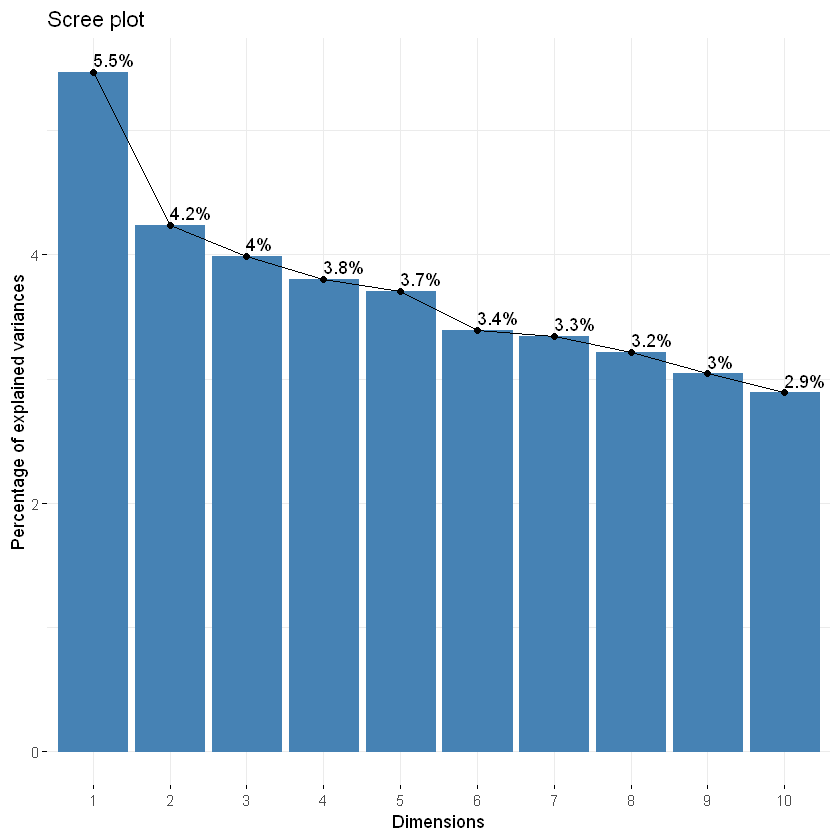

In [77]:
fviz_screeplot(res.mca,addlabels=TRUE)

### Análisis de correspondencia entre las variables

A primera vista podemos encontrar, que existe una fuerte asociación entre las calificaciones obtenidas en los tres cortes (G1,G2,G3), en donde supone creer que los resultados obtenidos por un estudiante en los primeros cortes, tienden a repetirse en los dos próximos cortes. 

También podemos encontrar que este los estudiantes que poseen una calificación entre 0 y 3, tienden a tener un tiempo alto en salidas con amigos, el mayor número de fallas en la materia y un consumo moderado de alcohol mientras trabajan.

Por otro lado, es interesante ver cómo variables como el consumo alto de alcohol mientras trabajan no supone una tendencia como naturalmente se creería en la disminución en la nota o calificación del curso, lo mismo para el apoyo extra educativo no supone un claro aumento en la calificación del estudiante, con el fin de analizar estas controversias racionales, más adelante se determinará si una alta dependencia entre dos o más variables se quedan con la mayor parte de representación de los datos.  

Warning message:
"ggrepel: 53 unlabeled data points (too many overlaps). Consider increasing max.overlaps"

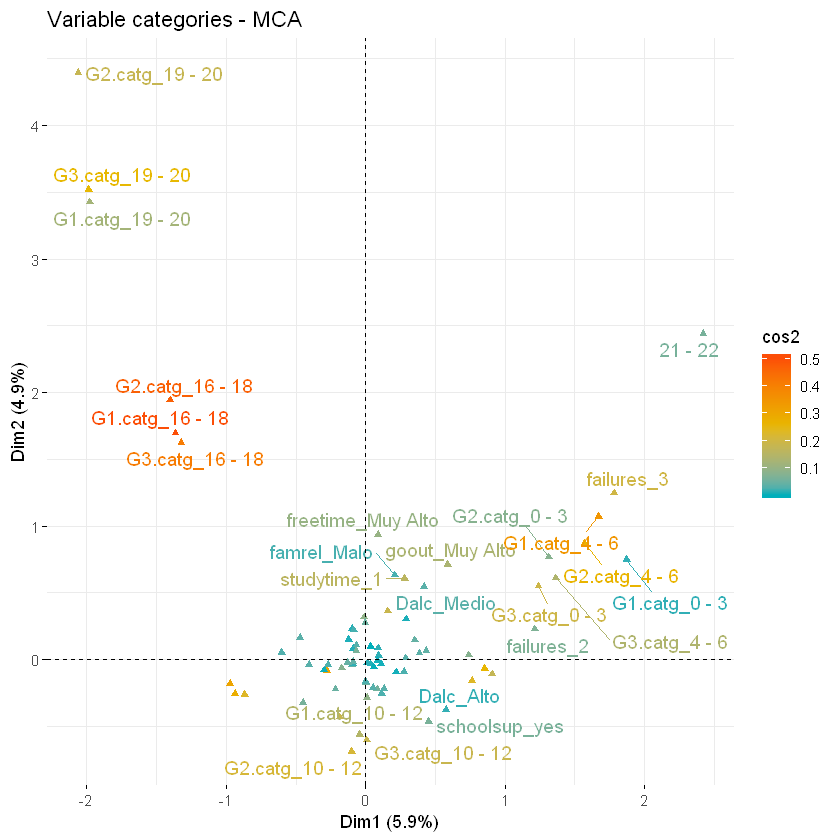

In [69]:
fviz_mca_var(res.mca,col.var ="cos2",gradient.cols=c("#00AFBB","#E7B800","#FC4E07"),
            repel=TRUE, ggtheme = theme_minimal())

### Selección de Variables y Reducción de Dimensiones
En el desarrollo del análisis anterior, se pudo determinar la necesidad de extraer variables que pueden estar afectando el resultado del MCA gracias a una fuerte relación entre ellas, desequilibrando la representación de las demás variables categóricas.

En este caso se opta por sacar a las variables, calificación del primer y segundo corte (G1 y G2) y la edad de los estudiantes que no se encuentra relevante en los resultados.

In [80]:
df_mca_2 <- select(df,-absences,-school,-age,-G1,-G2,-G3,-traveltime,-Mjob,-Fjob,-nursery,-Walc,-higher,-guardian,-Medu,
                -Fedu,-reason,-G2.catg,-G1.catg,-age.catg)

In [81]:
res.mca.2 <- MCA(df_mca_2,graph=TRUE)

En esta ocasión se puede extraer conclusiones interesantes de la correspondencia entre las categorías como, cantidad de horas de estudio y calificación entre 19 y 20, ya que a mayor cantidad de horas de estudio supone una mayor calificación del curso. 

Es claro que los estudiantes hombres tienen un mayor consumo de alcohol mientras trabajan, más tiempo libre y por tanto tienden a salir más con sus amigos, pero esto no supone una calificación demasiado baja ya que podría suponer una calificación alrededor de 16 y 18 de nota.

Lo que podemos apreciar en otro cuadrante es que la falta de internet podría suponer una calificación cercana a 0 y lo mismo a mayor cantidad de fallas en la materia y a que se encuentran viviendo en zonas rurales.

Warning message:
"ggrepel: 23 unlabeled data points (too many overlaps). Consider increasing max.overlaps"

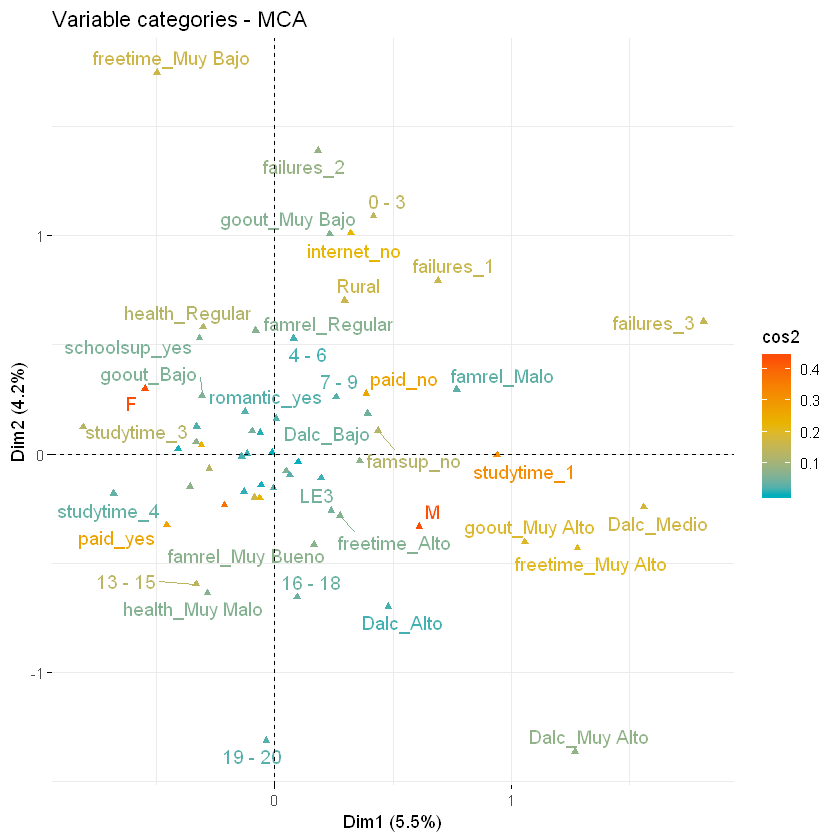

In [82]:
fviz_mca_var(res.mca.2,col.var ="cos2",gradient.cols=c("#00AFBB","#E7B800","#FC4E07"),
            repel=TRUE, ggtheme = theme_minimal())